## 7.1 MySQL 소개

MySQL은 전 세계에서 가장 많이 사용하는 오픈소스 관계형 데이터베이스 관리 시스템으로 파이썬 뿐만 아니라 다양한 언어에서 사용할 수 있도록 API를 지원하고 있습니다. 최근 다양한 기업에서 MySQL 이외에 데이터베이스를 실무에 적용하는 사례가 있지만 전통적인 관계형 데이터베이스 관리 시스템에서는 MySQL 사용이 절대적입니다. 이번에는 파이썬에서 어떻게 MySQL을 사용하는지 알아보고 학습툴을 만들어보겠습니다!

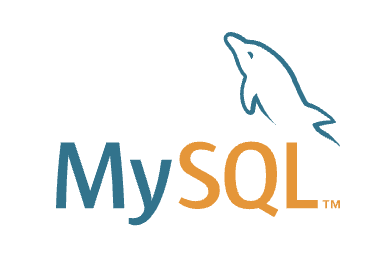

## 7.2 파이썬으로 데이터베이스 연동하기

MySQL에서는 데이터를 조작하기 위해 다음 4가지 명령어를 지원합니다.


* select : 데이터 테이블에서 데이터를 조회합니다.

In [ ]:
#mysql 예시입니다.
SELECT *
From table_name

* insert : 데이터 테이블에 데이터를 삽입합니다.

In [ ]:
#mysql 예시입니다.
INSERT INTO table_name (column1, column2, column3, ...)
VALUES (value1, value2, value3, ...);

* update : 데이터 테이블의 데이터를 변경합니다.

In [ ]:
#mysql 예시입니다.
UPDATE table_name
SET column1 = value1, column2 = value2, ...
WHERE condition;

* delete : 데이터 테이블의 데이터를 삭제합니다.

In [ ]:
#mysql 예시입니다.
DELETE FROM table_name WHERE condition;

파이썬에서 위와 같은 MySQL을 사용하려면 PyMySQL 모듈을 불러와야 합니다.

In [ ]:
#PyMySQL 모듈을 불러오기
import pymysql

### 7.2.1 데이터베이스 연결하기

아래 작업을 하기 위해서는 먼저 로컬 환경에 따라 MySQL 설치와 서버 연결, 그리고 데이터베이스 생성(예제에서는 ‘homestead’)이 먼저 이루어져야 합니다.

만약 MySQL 설치와 서버 생성에 어려움을 겪으시는 분은 댓글 남겨주시면 추가 게시글을 업로드하겠습니다! 😄

### 호스트란?

네트워크에 연결되어 있는 컴퓨터들을 호스트라고 합니다. 
데이터 조작을 위해서는 제일 먼저 MySQL 호스트 DB서버에 연결되어 있어야 합니다. **pymysql.connect()** 함수를 사용하여 DB 서버에 접속할 수 있습니다.  connect() 함수의 인자는 다음과 같습니다.

- host : 데이터베이스 서버가 존재하는 호스트 주소
- user : 데이터베이스 로그인 유저
- passwd : 데이터베이스 로그인 패스워드
- db : 데이터베이스명
- charset : 데이터베이스에서 사용할 charset 인코딩

(이때  host, user, passwd, db는 사용자께서 설정해주시는 부분으로 예제와 다를 수 있습니다.)

데이터베이스 사용이 종료된 이후에는 반드시 DB연결을 닫아야합니다. 데이터베이스 서버에 한동한 연결이 남아 있기 때문에 서버 리소스 활동에 좋지 않기 때문입니다.
서버연결 닫는 함수는 **close()** 입니다.

서버 연결하기

In [ ]:
db = None
try:
	db = pymysql.connect(
		host = '<데이터베이스 서버가 존재하는 호스트 주소>'
		user = '<데이터베이스 로그인 유저>'
		passwd = '<데이터베이스 로그인 패스워드>'
		db = '<데이터베이스명>'
		charset = 'utf8'
	)

서버 종료하기

In [ ]:
except Exception as e:
	print(e)

finally: 
	if db is not None:
		db.close()

### 7.2.2 데이터 조작하기

서버 연결과 종료하는 과정을 생략하고 주요 과정을 어떻게 하는지 같이 알아봅시다!

테이블 생성

In [ ]:
import pymysql

db = None
try:
    # DB 호스트 정보에 맞게 입력해주세요
    db =pymysql.connect(host='localhost', user='root', password='각자의 비밀번호', charset='utf8',db='homestead') 

    # 테이블 생성 sql 정의
    sql ='''
    CREATE TABLE tb_student (
        id int primary key auto_increment not null,
        name varchar(32),
        age int,
        address varchar(32)
    ) ENGINE=InnoDB DEFAULT CHARSET=utf8
    '''

    # 테이블 생성
    with db.cursor() as cursor:
        cursor.execute(sql)

except Exception as e:
    print(e)

finally:
    if db is not None:
        db.close()


(1050, "Table 'tb_student' already exists")


데이터 삽입 

In [ ]:
sql = '''
		INSERT tb_student(name, age, address) values('Kei', 35, 'Korea')
'''
	
#데이터 삽입하기
with db.cursor() as cursor:
		cursor.execute(sql)
		db.commit()

데이터 변경

In [ ]:
id = 1 # 데이터 id
sql = '''
	UPDATE tb_student sset name="케이", age = 36 where id = %d
''' % id 

# 데이터 수정하기
with db.cursor() as curssor:
	cursor.execute(sql)
	db.commit()

데이터 삭제

In [ ]:
id = 1
sql = '''
	DELETE from tb_student where id = %d
''' % id

# 데이터 삭제하기
with db.cursor() as cursor:
	cursor.execute(sql)
	db.commit

다수의 데이터를 임의로 DB에 삽입해 데이터 조회

In [ ]:
import pymysql
import pandas as pd

db = None
try:
    # DB 호스트 정보에 맞게 입력해주세요
    db =pymysql.connect(host='localhost', user='root', password='각자의 비밀번호', charset='utf8',db='homestead')

    # 데이터 정의 : students 리스트에 학생정보가 저장된 딕셔너리 데이터를 만듭니다.
    students = [
        {'name': 'Kei', 'age': 36, 'address' : 'PUSAN'},
        {'name': 'Tony', 'age': 34, 'address': 'PUSAN'},
        {'name': 'Jaeyoo', 'age': 39, 'address': 'GWANGJU'},
        {'name': 'Grace', 'age': 28, 'address': 'SEOUL'},
        {'name': 'Jenny', 'age': 27, 'address': 'SEOUL'},
    ]

    # 데이터 db에 추가 
    for s in students:
        with db.cursor() as cursor:
            sql = '''
                    insert tb_student(name, age, address) values("%s",%d,"%s")
                    ''' % (s['name'], s['age'], s['address'])
            cursor.execute(sql)
    db.commit() # 커밋

    # 30대 학생만 조회 
    cond_age = 30
    with db.cursor(pymysql.cursors.DictCursor) as cursor:
        sql = ''' 
        select * from tb_student where age > %d
        ''' % cond_age
        cursor.execute(sql) #select 명령을 위한 SQL 구문을 cursor.execute() 함수로 불러오기
        results = cursor.fetchall() #fetchall() 함수 : select 구문으로 조회한 모든 데이터 불러오는 함수
    print(results)

    # 이름 검색
    cond_name = 'Grace'
    with db.cursor(pymysql.cursors.DictCursor) as cursor:
        sql = ''' 
        select * from tb_student where name="%s"
        ''' % cond_name
        cursor.execute(sql)
        result = cursor.fetchone()
    print(result['name'], result['age'])

    # pandas 데이터프레임으로 표현
    df = pd.DataFrame(results)
    print(df)


except Exception as e:
    print(e)

finally:
    if db is not None:
        db.close()

[{'id': 1, 'name': 'Kei', 'age': 36, 'address': 'PUSAN'}, {'id': 2, 'name': 'Tony', 'age': 34, 'address': 'PUSAN'}, {'id': 3, 'name': 'Jaeyoo', 'age': 39, 'address': 'GWANGJU'}]
Grace 28
   id    name  age  address
0   1     Kei   36    PUSAN
1   2    Tony   34    PUSAN
2   3  Jaeyoo   39  GWANGJU


## 7.3 챗봇 학습툴 만들기

이번에는 **챗봇의 학습 데이터를 관리하는 툴**을 만들어 학습 데이터를 DB에 저장했을 때 실시간으로 챗봇 시스템에 적용될 수 있도록 해보겠습니다. 이를 위해 **챗봇이 이해할 수 있는 질문 정보**와 **해당 답변 데이터**를 관리하기 위한 툴이 필요합니다. 사용하는 학습 데이터는 챗봇의 답변 출력을 위해서만 사용되는 데이터로, 챗봇 학습툴을 통해 저장된 질문 유형과 답변만 챗봇 엔진이 처리할 수 있습니다. 

학습툴을 만들기 앞서 우리가 만들 토이 챗봇이 어떤 과정으로 학습 DB에서 데이터를 검색하는지 살펴볼까요?

- **챗봇 엔진 입력 처리 과정**
1. 입력되는 문장을 자연어 처리하여 **해당 문장의 의도, 개체명, 키워드 정보** 등을 추출합니다.
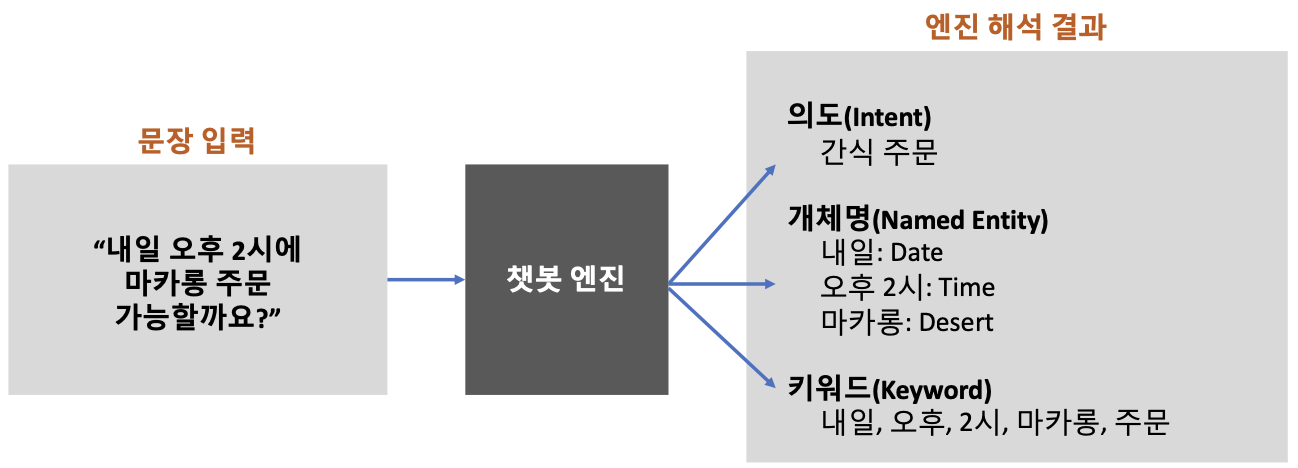
2. 엔진에서 해석한 결과를 이용해 학습 DB 내용을 검색합니다. 이때 해석 결과(의도, 개체명)에 매칭되는 답변 정보가 DB에 존재하면 데이터를 불러와 사용자에게 답변으로 제공합니다.
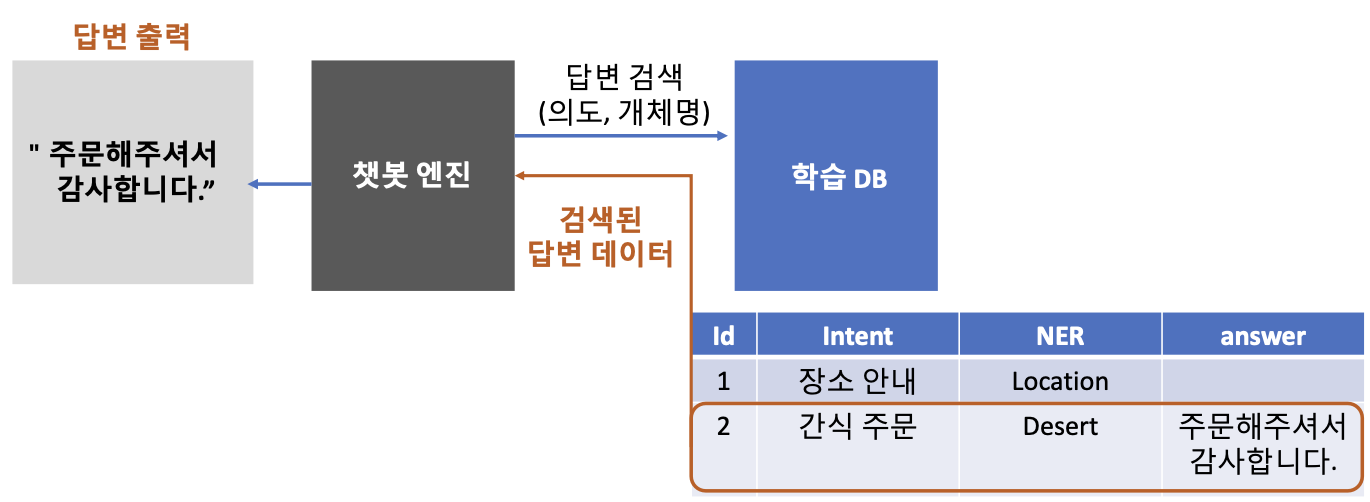

### 7.3.1 프로젝트 구조

이제부터 실습을 통해 챗봇 기능을 하나하나 만들어 보겠습니다.

이전에 사용하던 소스 코드가 계속해서 이어지며, 경우에 따라서는 일부 소스만 보여줄 수도 있습니다. 아래는 앞으로 우리가 완성하게 될 챗봇 프로젝트 디렉터리 구조입니다. 실습할 때 프로젝트 디렉터리 구조에 맞게 파일을 생성할 것이니 잘 따라오세요! 

**⚠️프로젝트 구조나 디렉터리명이 다를 경우 동작이 안 될 수도 있습니다! 꼭 아래 구조를 따라주세요!**

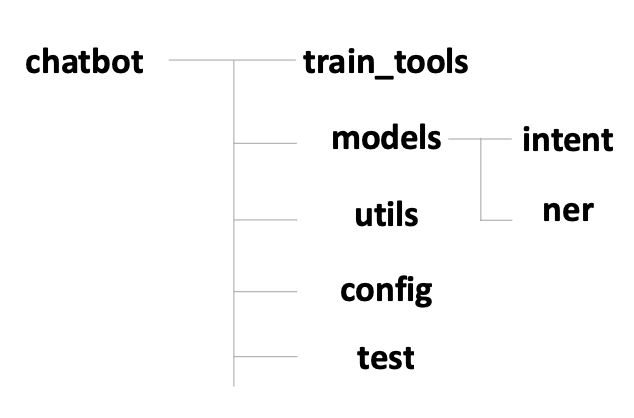

- train_tools: 챗봇 학습툴 관련 파일
- models: 챗봇 엔진에서 사용하는 딥러닝 모델 관련 파일
- intent: 의도 분류 모델 관련 파일
- ner: 개체 인식 모델 관련 파일
- utils: 챗봇 개발에 필요한 유틸리티 라이브러리
- config: 챗봇 개발에 필요한 설정
- test: 챗봇 개발에 필요한 테스트 코드

### 7.3.2 학습용 데이터베이스 설계 및 데이터 테이블 생성

먼저 챗봇 엔진 답변 처리 과정에서 필요한 DB 구조를 설계해보고 학습할 수 있는 툴을 만들어봅시다.

아래와 같이 학습툴에 필요한 DB 구조를 간단하게 설계하겠습니다.

(우리가 만들고자하는 챗봇은 간단한 수준의 토이 챗봇이므로 데이터 무결성이나 정규화 부분은 크게 신경쓰지 않겠습니다.)

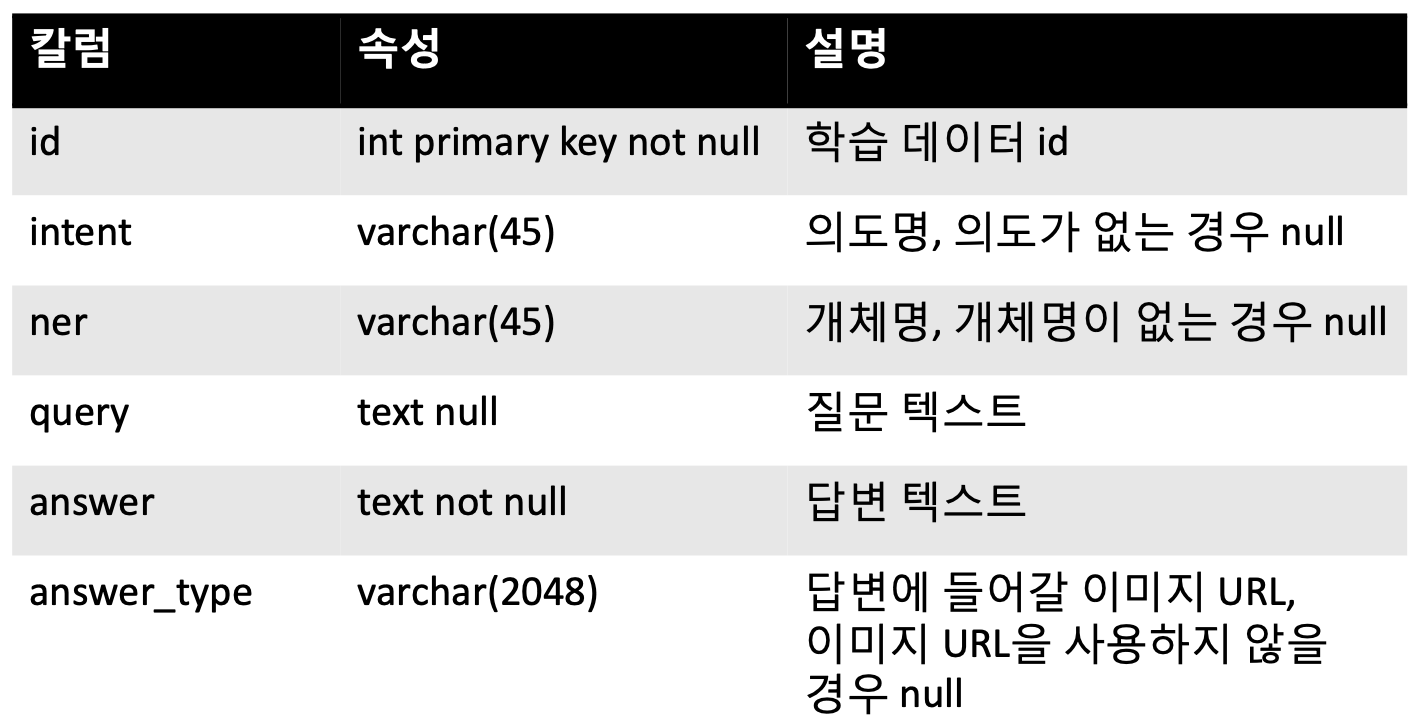

DB 서버 정보를 /config 디렉터리 내에 파일로 따로 관리하겠습니다. DatabaseConfig.py 파일을 생성하여 아래와 같이 작성하세요. DB 접속 정보는 각자 환경에 맞게 입력하면 됩니다.

In [ ]:
DB_HOST = "127.0.0.1"
DB_USER = "root"
DB_PASSWORD = "각자의 비밀번호"
DB_NAME = "homestead"

def DatabaseConfig():
    global DB_HOST, DB_USER, DB_PASSWORD, DB_NAME

다음으로 챗봇 데이터 학습용 테이블을 생성합니다. 해당 소스는 챗봇 학습툴과 관련 있기 때문에 /train_tools/qna 디렉터리 내에 생성하고, 파일명은 create_train_data_table.py 입니다.

create_train_data_table.py를 실행하면 SQL 구문으로 정의했던 데이터 테이블이 생성됩니다. 생성이 안 되거나 DB 접속 에러가 발생하는 경우에는 DB 접속 정보 혹은 SQL 구문에 오류가 없는지 확인해보세요.

In [ ]:
import pymysql
from config.DatabaseConfig import * # DB 접속 정보 불러오기

db = None
try:
		db = pymysql.connect(
					host=DB_HOST,
					user=DB_USER,
					passwd=DB_PASSWORD,
					db=DB_NAME,
					charset='utf8'
		)

		# 테이블 생성 sql 정의
		sql = '''
				CREATE TABLE IF NOT EXISTS 'chatbot_train_data' (
					`id` INT UNSIGNED NOT NULL AUTO_INCREMENT,
					`intent` VARCHAR(45) NULL,
					`ner` VARCHAR(1024) NULL,
					`query` TEXT NULL,
					`answer` TEXT NOT NULL,
					`answer_image` VARCHAR(2048) NULL,
					PRIMARY KEY (`id`))
		ENGINE = InnoDB DEFAULT CHARSET=utf8
		'''
		 
		# 테이블 생성
		with db.cursor() as cursor:
				cursor.execute(sql)
		
except Exception as e:
		print(e)

finally:
		if db is not None:
				db.close()

### 7.3.3 챗봇 학습 데이터 엑셀 파일 및 DB 연동

엑셀을 통해 학습 데이터를 추가하거나 삭제하는 등 엑셀 파일을 학습툴에 입력해 DB 내용을 업데이트하는 형태로 만들어봅시다. 아래는 예제로 제공되는 학습 데이터 엑셀 파일 구조(train_data.xlsx)입니다.

챗봇에 질문하는 경우 엑셀 파일 내에 존재하는 질문 유형의 답변만 제공 가능합니다.

예제 파일은 아래 링크에서 다운로드 받으실 수 있습니다. [https://github.com/keiraydev/chatbot/blob/master/train_tools/qna/train_data.xlsx](https://github.com/keiraydev/chatbot/blob/master/train_tools/qna/train_data.xlsx)

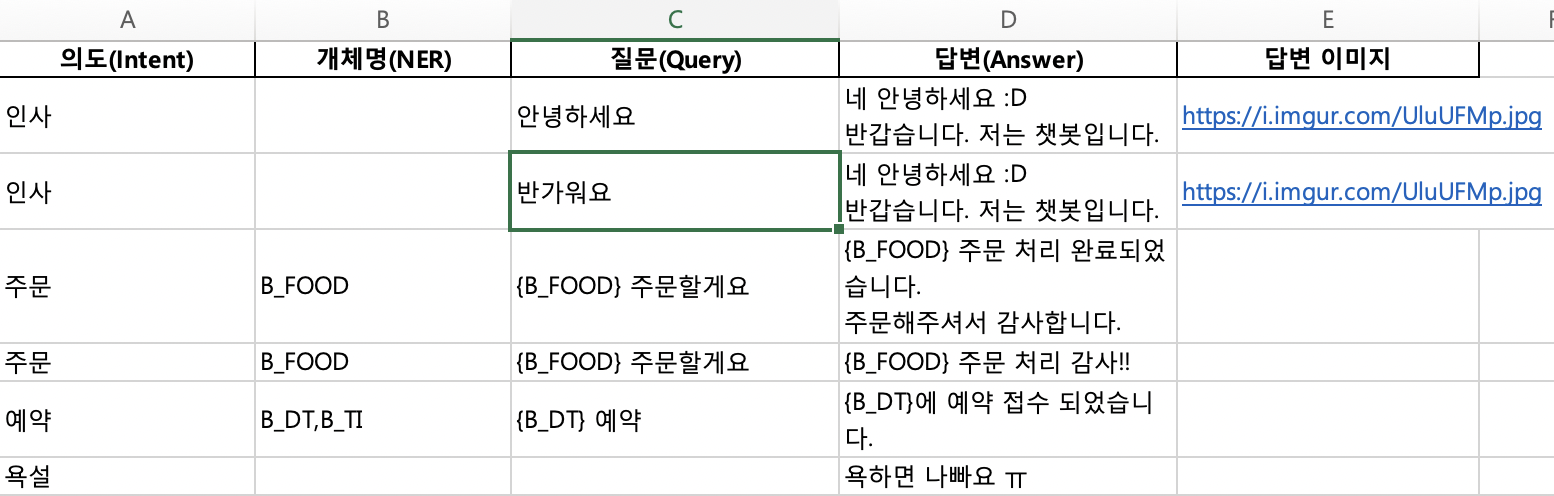

**총 5개의 컬럼**

- 의도(Intent): 질문의 의도를 나타내는 텍스트, 의도가 없는 경우 비워둠
- 개체명 인식(NER): 질문에 필요한 개체명, 개체명이 없는 경우 비워둠
- 질문(Query): 질문 텍스트
- 답변(Answer): 답변 텍스트
- 답변 이미지: 답변에 들어갈 이미지 URL, 이미지 URL이 없는 경우 비워둠



엑셀 파일을 읽어와 DB와 데이터를 동기화하는 코드를 살펴보겠습니다. 해당 소스 역시 챗봇 학습 툴과 관련있기에 /train_tools/qna 디렉터리 내에 생성하고, 파일명은 load_train_data.py입니다.

우리가 만든 load_trani_data.py 프로그램을 실행할 때마다 엑셀 파일 내부의 데이터와 DB 내 학습 데이터를 동일하게 유지하기 위해 DB 데이터를 먼저 초기화해줍니다. (본 예제는 매번 DB 데이터를 지우고 새로 데이터를 입력하는 구조로 추후 개선이 필요하다는 것을 미리 알려드립니다.)

all_clear_train_data() 함수의 내부를 살펴보면, delete 명령어를 사용해 챗봇 학습 데이터 테이블의 내용을 삭제한 후 AUTO_INCREMENT=1로 auto increment 속성을 1로 초기화합니다.

In [ ]:
import pymysql
import openpyxl

from config.DatabasetConfig import * # DB 접속 정보 불러오기

# 학습 데이터 초기화
def all_clear_train_data(db):
	# 기존 학습 데이터 삭제
	sql = '''
		delete from chatbot_train_data
    '''
    with db.cursor() as cursor:
        cursor.execute(sql)

    # auto increment 초기화
    sql = '''
        ALTER TABLE chatbot_train_data AUTO_INCREMENT=1
    '''
    with db.cursor() as cursor:
       cursor.execute(sql)

다음으로 insert_data() 함수의 내부를 살펴보면, insert 명령어를 사용해 엑셀에서 불러온 데이터 열을 DB에 저장합니다.

In [ ]:
# db에 데이터 저장
def insert_data(db, xls_row):
    intent, ner, query, answer, answer_img_url = xls_row
    
    sql = '''
    INSERT chatbot_train_data(intent, ner, query, answer, answer_image)
        values(
            '%s', '%s', '%s', '%s', '%s'
        )
    ''' % (intent.value, ner.value, query.value, answer.value, answer_img_url.value)
    
    # 액셀에서 불러온 cell에 데이터가 없는 경우 null로 치환
    sql = sql.replace("'None'", "null")
    
    with db.cursor() as cursor:
        cursor.execute(sql)
        print('{} 저장'.format(query.value))
        db.commit()

마지막으로 OpenPYXL 모듈을 이용해 엑셀 파일을 읽어와 DB에 저장합니다.

In [ ]:
import openpyxl
#train_file 은 개인 컴퓨터 qna 파일 안에 train_data를 불러오는 주소를 설정하는 것입니다!
train_file = 'C:/Users/Desktop/데이크루/chatbot-master/train_tools/qna/train_data.xlsx'
db = None
try:
    db = pymysql.connect(
        host=DB_HOST,
        user=DB_USER,
        passwd=DB_PASSWORD,
        db=DB_NAME,
        charset='utf8')

    # 기존 학습 데이터 초기화
    #all_clear_train_data(db)

    # 학습 엑셀 파일 불러오기
    wb = openpyxl.load_workbook(train_file)
    sheet = wb['Sheet1']
    for row in sheet.iter_rows(min_row=2): # 헤더는 불러오지 않음
        # 데이터 저장
        insert_data(db, row)

    wb.close()

except Exception as e:
    print(e)
    
finally:
    if db is not None:
        db.close()

안녕하세요 저장
반가워요 저장
{B_FOOD} 주문할게요 저장
{B_FOOD} 주문할게요 저장
{B_DT} 예약 저장
None 저장


엑셀 파일 내용을 DB에 학습한 결과를 확인하기 위해 select 구문을 실행하면 chatbot_train_data 테이블에 엑셀 내용과 동일하게 저장된 모습을 확인할 수 있습니다.

## 7.4 마치며

이번 시간에는 챗봇 엔진이 적절한 답변을 출력할 수 있도록 학습 데이터베이스를 구축하고, 학습 데이터를 엑셀 파일로 관리할 수 있는 간단한 툴을 만들어보았습니다. 챗봇 엔진이 어떻게 답변을 찾고, 어떻게 학습 데이터를 관리할 수 있는지 배울 수 있었던 시간이었습니다!

이후 다음 시간에 만들게 될 챗봇 엔진은 학습 DB에 항상 연결되어 있어 업데이트된 질문-답변 데이터를 실시간을 활용할 수 있고, 더불어 딥러닝 모델의 학습에 대해 다룰 예정입니다.